<a href="https://colab.research.google.com/github/reneSalmon/Google_TensorFlow_Certificate/blob/master/TensorFlow_Exam_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TensorFlow Developer skills

## How to use programm im Python, resolve issues, compile and run programs in PyCharm?

## How to find information about TensorFlow API incl. guides and API references on tensorflow.org 

## How to debug, investigate,  and solver error messages from the TensorFlow API?

## How to search beyond tensorflow.org to solve TF questions?

## How to create ML models usning TF wehre the model size is reasonable for the problem being solved?

##How to save ML models and check the model size?

In [ ]:
# Fetch the Keras session and save the model
# The signature definition is defined by the input and output tensors,
# and stored with the default serving key
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

In [ ]:
#Examine your saved model
#We'll use the command line utility saved_model_cli to look at the MetaGraphDefs (the models) 
#and SignatureDefs (the methods you can call) in our SavedModel.
saved_model_cli show --dir {export_path} --all

## How to solve compatibility discrepancies between different versions of TensorFlow?

# Neural network basics (DNN)


## How to build a model with handwritten numbers?

1. Load a prebuild dataset
2. Build neural network that classifies images
3. Train neural network
4. Evaluat accuracy of model

In [ ]:
#Setup
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


### How to load a dataset?

In [ ]:
#load data
minst = tf.keras.datasets.mnist #load dataset of 70.000 handwriting digits for image classification
(x_train, y_train), (x_test, y_test) = minst.load_data() #split dataset x = images, y = image labels
x_train, x_test = x_train / 255.0, x_test / 255.0 #normalize dataset

11501568/11490434 [==============================] - 0s 0us/step


### How to view image data?

In [ ]:
#view data
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])
print(x_train[0])

### How to build a ML model?

In [ ]:
# 2 Build machine learning model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

### How to make predictions?

In [ ]:
# 3 For each example, the model returns a vector of logits or log-odds scores, one for each class.
predictions = model(x_train[:1]).numpy()
predictions

### How to create probabilities for each class?

In [ ]:
# 4 The tf.nn.softmax function converts these logits to probabilities for each class
tf.nn.softmax(predictions).numpy()

### How to define a loss function?

In [ ]:
# 5 Define a loss function for training using losses.SparseCategoricalCrossentropy,
# which takes a vector of logits and a True index and returns a scalar loss for each example.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
# 6 This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.
# This untrained model gives probabilities close to random (1/10 for each class), 
# so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.
loss_fn(y_train[:1], predictions).numpy()

### How to compile a model?

In [ ]:
# 7 Configure and compile the model 
model.compile(optimizer="adam",
              loss=loss_fn,
              metrics=["accuracy"])

### How to train a model?


In [ ]:
# 1 Adjust model parameters and minimize loss
model.fit(x_train, y_train, epochs=5)

### How to check the model performance?

In [ ]:
# 2 Check the model performance 
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Image classifier accuracy is {accuracy} on this dataset")

In [ ]:
# 3 Return probability of the matching for a specific test
probability_model = tf.keras.Sequential([
    model, 
    tf.keras.layers.Softmax()
])

In [ ]:
results = probability_model(x_test[:5])
results

In [ ]:
rounded_results = tf.math.round(results)
rounded_results

In [ ]:
#Suggestion for results = [7, 2, 1, 0, 4]
# How to show the results in numbers automatically?
# How to compare the results?
y_test[:5]

## How to build a simple NN with TensorFlow?

In [ ]:
from tensorflow import keras 
import numpy as np

In [ ]:
# 1 Define and compile neural network
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])]) # 1 layer / 1 neuron

In [ ]:
# 2 Compile NN with 2 functions: Loss and optimizer
model.compile(optimizer="sgd", loss="mean_squared_error")

In [ ]:
# 3 Providing data
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [ ]:
# 4 Training NN
model.fit(xs, ys, epochs=500)
print(model.predict([10.0]))

## How to predict a house price with ML?

In this exercise you'll try to build a neural network that predicts the price of a house according to a simple formula.

So, imagine if house pricing was as easy as a house costs 50k + 50k per bedroom, so that a 1 bedroom house costs 100k, a 2 bedroom house costs 150k etc.

How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.

Hint: Your network might work better if you scale the house price down. You don't have to give the answer 400...it might be better to create something that predicts the number 4, and then your answer is in the 'hundreds of thousands' etc.

In [ ]:
# GRADED FUNCTION: house_model
def house_model(y_new):
    x = np.array([1.0, 2.0, 3.0, 4.0, 5.0 , 6.0], dtype=float)
    y = np.array([100.0, 150.0, 200.0, 250.0, 300.0, 350.0], dtype=float)
    model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
    model.compile(optimizer="SGD", loss="mse")
    model.fit(x,y, epochs=500)
    return model.predict(y_new)[0]

In [ ]:
prediction = house_model([7])
print(prediction)

## How to build, compile and train a sequential model with multiple layers?

In [ ]:
#Load fashion dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
training_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

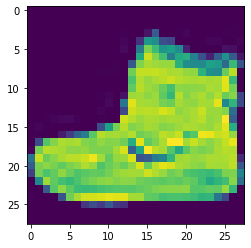

In [ ]:
#view data
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [ ]:
#Normalize data 
training_images = training_images/255
test_images = test_images/255

In [ ]:
from matplotlib.cbook import flatten
#Design model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation="relu"),
                                   tf.keras.layers.Dense(10, activation="softmax")])

In [ ]:
model.compile(optimizer="adam",
              loss= "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
model.fit(training_images, training_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4910 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3689 - accuracy: 0.8680
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3328 - accuracy: 0.8801
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3101 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2922 - accuracy: 0.8916


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3498 - accuracy: 0.8745


[0.3497617840766907, 0.8744999766349792]

In [ ]:
classifications = model.predict(test_images)
print(tf.math.round(classifications[:5]))

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(5, 10), dtype=float32)


In [ ]:
# Prediction [9,2,1,1,6]
test_labels[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [ ]:
np.argmax(classifications[0])

9

In [ ]:
#Outmate classification validation for a wanted number of examples 
def output_checker(number_of_examples):
  right = []
  wrong = []
  for i in range(number_of_examples):
    if np.argmax(classifications[i]) == test_labels[i]:
      #print(f'{i} prediction is right')
      right.append(i)
      

    else:
      #print(f'{i} prediction is wrong')
      wrong.append(i)

  #print(right)
  print(f'{len(wrong)} of {number_of_examples} are wrong classified \n List of wrong classified pictures: \n {wrong}')

In [ ]:
output_checker(1000)
output_checker

123 of 1000 are wrong classified 
 List of wrong classified pictures: 
 [17, 25, 27, 40, 42, 48, 49, 50, 51, 66, 68, 89, 98, 103, 107, 127, 147, 150, 151, 153, 170, 192, 222, 227, 239, 241, 244, 247, 255, 271, 282, 313, 314, 316, 324, 332, 344, 359, 361, 378, 381, 382, 389, 396, 404, 409, 410, 413, 441, 444, 454, 457, 460, 474, 476, 480, 490, 491, 499, 506, 511, 512, 526, 529, 546, 548, 562, 563, 565, 569, 572, 578, 586, 589, 595, 608, 616, 635, 637, 639, 661, 663, 664, 669, 670, 685, 688, 697, 701, 702, 711, 722, 725, 732, 753, 760, 761, 787, 800, 801, 830, 851, 881, 890, 902, 905, 926, 930, 935, 937, 939, 948, 956, 963, 965, 966, 967, 976, 977, 979, 985, 993, 994]


<function __main__.output_checker(number_of_examples)>

## What happens if you increase the amount of neurons?

In [ ]:
#Now test with 512 neurons
#What different results do you get for loss, training time etc? 
#Why do you think that's the case?

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(512, activation="relu"),
                          tf.keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classification = model.predict(test_images)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4740 - accuracy: 0.8316
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3585 - accuracy: 0.8688
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3214 - accuracy: 0.8809
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2976 - accuracy: 0.8902
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3439 - accuracy: 0.8752


In [ ]:
print(tf.math.round(classifications[0],0))
print(test_labels[0])

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32)
9


In [ ]:
#Hypothesis: Double the amount of neurons will increase accuracy
#But processing will take more time 

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(1024, activation="relu"),
                          tf.keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classification = model.predict(test_images)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4680 - accuracy: 0.8316
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3558 - accuracy: 0.8686
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3214 - accuracy: 0.8829
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2955 - accuracy: 0.8909
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3442 - accuracy: 0.8773


In [ ]:
# Result: Training takes longer and accuracy is increased from 0.8656 to 0.8757
print(tf.math.round(classifications[0],0))
print(test_labels[0])

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32)
9


## What would happen if you remove the Flatten layer?

In [ ]:
#What would happen if you remove the Flatten() layer. Why do you think that's the case?

# 1 With Flatten we create of out 28x28 matrix an array of 784X1
# 2 RoT = First Layer should be in same shape as input data 
# 3 Ergo: Will will get an error because wrong shape of data. 

## What does the final output layer do?

In [ ]:
#Consider the final (output) layers. Why are there 10 of them? 
#What would happen if you had a different amount than 10? For example, try training the network with 5.

# 1 There are 10 neurons because every neuron represents a class
# 2 Error. The output layer has to represent the same amount of neurons as the classes in the dataset

## What is the effect of additional layers?

In [ ]:
#Consider the effects of additional layers in the network. 
#What will happen if you add another layer between the one with 512 and the final layer with 10.

# The computational time will increase and in general the accuracy of the model, too.
# For small data there will not be a significatn difference, but for bigger datasets extra layers are often mandatory.

## What is the impact of more or less epochs?

In [ ]:
#Consider the impact of training for more or less epochs. Why do you think that would be the case?

# 1 In general more epochs will increase the accuracy
# 2 In general less epochs will decrease the accuracy
# 3 In some point the loss will stop decreaing and start increase again => sign for overfitting


## How and why do you normalize data? 

In [ ]:
#Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. 
#What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

# Test with normalized data
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2020
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0814
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0523
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0372
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0760
[1.2117712e-08 3.9707051e-09 1.0017967e-07 6.2315405e-05 5.9074127e-13 4.6154049e-08 2.1332010e-15 9.9993706e-01 1.0906300e-08 4.9329259e-07]
7


In [ ]:
# Test without normalized data
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 2.6463
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3696
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3135
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2772
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2926
[2.1830795e-27 2.6469789e-23 3.6237204e-17 5.2373847e-16 3.6260253e-27 1.8939696e-24 0.0000000e+00 1.0000000e+00 9.3582606e-30 1.7994008e-19]
7


In [ ]:
# Results
# 1 Loss is without normalization higher
# 2 Speed of procesing data is higher ... interesting :-D

## How and why do you implement callbacks?

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("acc") > 0.9):
      print("\nReached 85% of accuracy so cancelling training!")
      self.model.stop_training = True
  
callbacks = myCallback()

#Preprocess dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images/255
test_images = test_images/255

#Create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="acc")
model.fit(training_images, training_labels, epochs=8, callbacks=[callbacks])

Epoch 1/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4739 - acc: 0.8305
Epoch 2/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3600 - acc: 0.8678
Epoch 3/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3223 - acc: 0.8816
Epoch 4/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2971 - acc: 0.8899
Epoch 5/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2809 - acc: 0.8958
Epoch 6/8
1865/1875 [============================>.] - ETA: 0s - loss: 0.2654 - acc: 0.9010
Reached 85% of accuracy so cancelling training!
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2654 - acc: 0.9010


In [ ]:
#Evaluate performance
model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)
print(tf.math.round(predictions[:5]))
print(test_labels[:5])

313/313 [==============================] - 1s 2ms/step - loss: 0.3289 - acc: 0.8864
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(5, 10), dtype=float32)
[9 2 1 1 6]


In [ ]:
evaluation = model.evaluate(test_images, test_labels)
print("test_loss, test_acc:", evaluation)

313/313 [==============================] - 1s 3ms/step - loss: 0.3289 - acc: 0.8864
test_loss, test_acc: [0.32890239357948303, 0.8863999843597412]


In [ ]:
np.argmax(predictions[0])

9

In [ ]:
#Outmate classification validation for a wanted number of examples 

def output_checker(number_of_examples):
  right = []
  wrong = []
  for i in range(number_of_examples):
    if np.argmax(predictions[i]) == test_labels[i]:
      #print(f'{i} prediction is right')
      right.append(i)
      

    else:
      #print(f'{i} prediction is wrong')
      wrong.append(i)

  #print(right)
  print(f'{len(wrong)} of {number_of_examples} are wrong classified \n List of wrong classified pictures: \n {wrong}')

In [ ]:
output_checker(1000)

108 of 1000 are wrong classified 
 List of wrong classified pictures: 
 [12, 17, 23, 25, 40, 42, 49, 51, 66, 68, 89, 98, 103, 107, 127, 135, 136, 141, 147, 150, 151, 153, 155, 163, 172, 192, 227, 239, 241, 244, 249, 255, 282, 316, 324, 325, 332, 344, 359, 361, 367, 368, 374, 378, 381, 382, 396, 404, 406, 413, 441, 444, 454, 457, 460, 474, 490, 491, 499, 529, 548, 562, 563, 565, 569, 572, 577, 586, 595, 635, 639, 663, 664, 669, 670, 671, 681, 688, 689, 711, 722, 725, 732, 753, 760, 761, 787, 800, 801, 830, 851, 881, 887, 890, 902, 905, 909, 921, 930, 935, 963, 965, 971, 976, 977, 979, 985, 994]


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## How to build a model with binary classification?

In [ ]:
  # We need a dataset for two classes e.g. images of humans and images of horses
  # We have to specifiy our outputlayer for a binary classification
  # We have only 1 output neuron
  # We have to use the sigmoid activation function
  # It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
  tf.keras.layers.Dense(1, activation='sigmoid')

## How to prevent overfitting?

In [ ]:
# Hold-out: Split dataset (80/20)
# Cross-validation data: (Create k groups for testing)
# Train with more data
# Data augmendation: Increase the variety of data by e.g. rotating, flipping, rescaling, shifting
# Feature selection: Reduce amount of features
# L1/L2 regularization: Reduce weights of features to zero (L1) or almost to zero (L2) 
# Dropout: A form of regularization, which ignores a subset of neurons in layers 
# Callbacks: We stop and save the model training at a treshold we define  
# Reduce complexity of model by decrease number of neurons and layers


## How to use pretrained models? (transfer learning)

What is transfer learning and why do we do it?

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem. For instance, features from a model that has learned to identify racoons may be useful to kick-start a model meant to identify tanukis.

Transfer learning is usually done for tasks where your dataset has too little data to train a full-scale model from scratch.

The most common incarnation of transfer learning in the context of deep learning is the following workflow:

1. Take layers from a previously trained model.
2. Freeze them, so as to avoid destroying any of the information they contain during future training rounds.
3. Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.
4. Train the new layers on your dataset.

In [ ]:
# Import libraries 

import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

# Import pretrained weights for InceptionV3 
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-08-19 19:16:40--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   260MB/s    in 0.3s    

2022-08-19 19:16:41 (260 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Instantiate pretrained model: inceptionV3

from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
# Create new classification model 

from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = tf.keras.layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense  (1, activation='sigmoid')(x)           


# Stack classification layers as x on top of the last output layer from InceptionV3
model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# Import and preprocess data

!gdown --id 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Define our example directories and files
base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
To: /content/cats_and_dogs_filtered.zip
100% 68.6M/68.6M [00:01<00:00, 42.9MB/s]
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Train model 

history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 29s - loss: 0.3704 - accuracy: 0.8590 - val_loss: 0.1011 - val_accuracy: 0.9610 - 29s/epoch - 291ms/step
Epoch 2/20
100/100 - 17s - loss: 0.2177 - accuracy: 0.9160 - val_loss: 0.0759 - val_accuracy: 0.9730 - 17s/epoch - 169ms/step
Epoch 3/20
100/100 - 16s - loss: 0.2000 - accuracy: 0.9290 - val_loss: 0.1065 - val_accuracy: 0.9610 - 16s/epoch - 164ms/step
Epoch 4/20
100/100 - 16s - loss: 0.1849 - accuracy: 0.9275 - val_loss: 0.0986 - val_accuracy: 0.9630 - 16s/epoch - 160ms/step
Epoch 5/20
100/100 - 15s - loss: 0.1852 - accuracy: 0.9315 - val_loss: 0.1053 - val_accuracy: 0.9670 - 15s/epoch - 154ms/step
Epoch 6/20
100/100 - 15s - loss: 0.1718 - accuracy: 0.9395 - val_loss: 0.0996 - val_accuracy: 0.9710 - 15s/epoch - 154ms/step
Epoch 7/20
100/100 - 15s - loss: 0.1699 - accuracy: 0.9470 - val_loss: 0.2123 - val_accuracy: 0.9400 - 15s/epoch - 154ms/step
Epoch 8/20
100/100 - 15s - loss: 0.1616 - accuracy: 0.9400 - val_loss: 0.0884 - val_accuracy: 0.9730 - 15s/epoch - 154

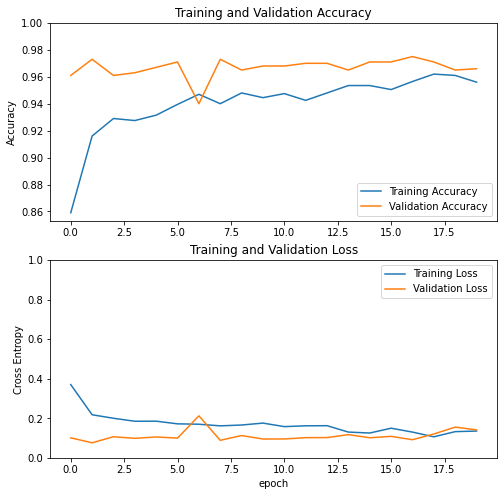

In [ ]:
# Evaluate model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## How to extract features from a pretrained model?

**What is feature extrations?**

Feature extraction uses the representations learned by a previous network to extract meaningful features from new samples. You simply add a new classifier, which will be trained from scratch, on top of the pretrained model so that you can repurpose the feature maps learned previously for the dataset.

You do not need to (re)train the entire model. The base convolutional network already contains features that are generically useful for classifying pictures. However, the final, classification part of the pretrained model is specific to the original classification task, and subsequently specific to the set of classes on which the model was trained.

Typical transfer-learning workflow:
1. Instantiate a base model and load pre-trained weights into it.
2. Run your new dataset through it and record the output of one (or several) layers from the base model. This is called feature extraction.
3. Use that output as input data for a new, smaller model.

Source: https://www.tensorflow.org/guide/keras/transfer_learning

In [ ]:
# 1 Instantiate base model with pre-trainged weights

base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [ ]:
# 2 Freeze the base model

base_model.trainable = False

In [ ]:
# 3 Create new model on top

inputs = keras.Input(shape=(150, 150, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
# 4 Train the model on new data
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])
model.fit(new_dataset, epochs=20, callbacks=..., validation_data=...)

## How to ensure that input to a model are in the correct shape?

## How to ensure that the test data match to the input shape of a neural network?

## How can you ensure that the output data match with the input shape for the test data?

## How and why do you do batch loading of data?

## How do you use data from different sources?

In [ ]:
#Data from website link
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset = tf.keras.utils.get_file('aclImdb_v1.tar.gz', url,
                                  untar=True, cache_dir='.',
                                  cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

train_dir = os.path.join(dataset_dir, 'train')

# remove unused folders to make it easier to load the data
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

## How do you use datasets in different formats? (e.g. json and csv)

In [ ]:
# sarcasm.json
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
  
import json

with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_size = 20000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: /content/sarcasm.json
100% 5.64M/5.64M [00:00<00:00, 311MB/s]


## How do you use datasets from tf.data.datasets?

In [ ]:
# if not in colab
pip install -q tensorflow-datasets

#text
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


# Image classification - Computer vision (CNN)

---



## How do you define CNN with Conv2D and pooling layers?

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## How to build a binary classification model?

### Import dataset

In [ ]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:03<00:00, 47.0MB/s]


In [ ]:
import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

### Create directories for data labeling with ImageDataGenerator

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

### Explore data

In [ ]:
# View images in directories
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse47-6.png', 'horse34-2.png', 'horse16-0.png', 'horse35-3.png', 'horse07-9.png', 'horse50-8.png', 'horse26-7.png', 'horse11-7.png', 'horse18-4.png', 'horse22-0.png']
['human11-00.png', 'human06-01.png', 'human15-20.png', 'human04-09.png', 'human01-30.png', 'human15-13.png', 'human14-07.png', 'human11-12.png', 'human06-06.png', 'human11-01.png']


In [ ]:
#Count total number of images
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


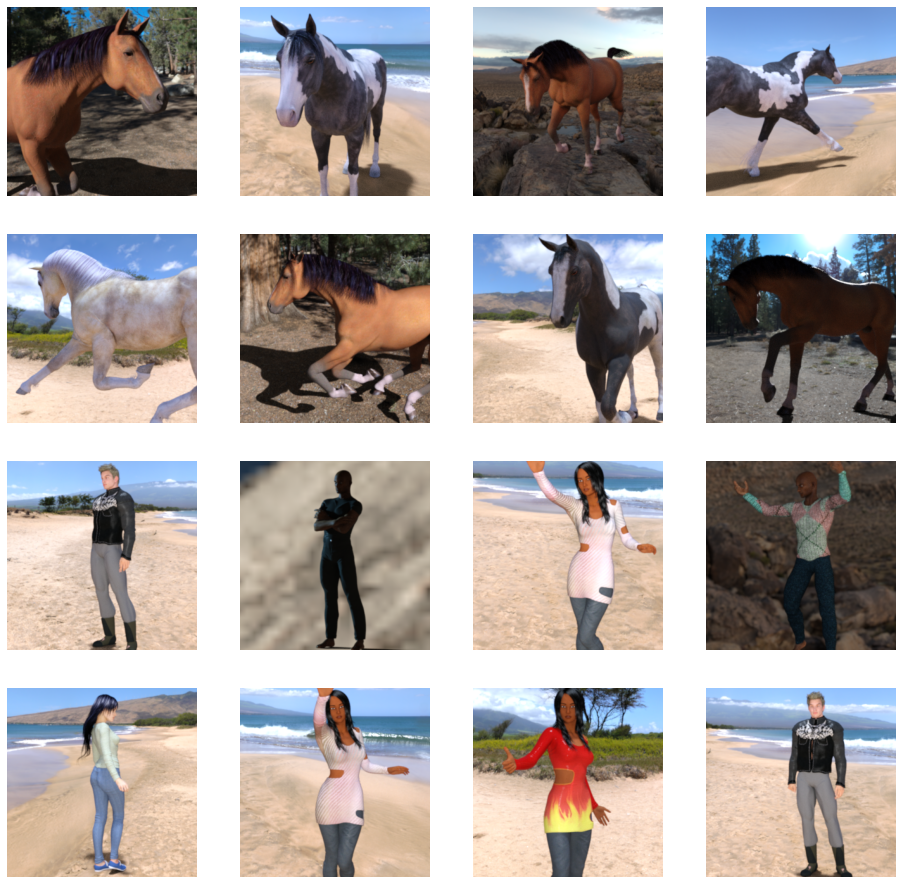

In [ ]:
#Look at pictures
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Build model

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

### Preprocess data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


### Train model

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 86s 10s/step - loss: 0.8939 - accuracy: 0.4983
Epoch 2/15
8/8 [==============================] - 79s 10s/step - loss: 0.8420 - accuracy: 0.6385
Epoch 3/15
8/8 [==============================] - 81s 10s/step - loss: 0.8014 - accuracy: 0.7052
Epoch 4/15
8/8 [==============================] - 91s 11s/step - loss: 0.4291 - accuracy: 0.8613
Epoch 5/15
8/8 [==============================] - 93s 11s/step - loss: 0.4795 - accuracy: 0.8287
Epoch 6/15
8/8 [==============================] - 87s 12s/step - loss: 0.1754 - accuracy: 0.9321
Epoch 7/15
8/8 [==============================] - 83s 10s/step - loss: 0.3798 - accuracy: 0.8699
Epoch 8/15
8/8 [==============================] - 81s 10s/step - loss: 0.3950 - accuracy: 0.9210
Epoch 9/15
8/8 [==============================] - 82s 12s/step - loss: 0.2126 - accuracy: 0.9255
Epoch 10/15
8/8 [==============================] - 85s 10s/step - loss: 0.1061 - accuracy: 0.9588
Epoch 11/15
8/8 [============

### Make predictions

In [ ]:
# Upload image from your file system, to test if it works
import numpy as np
from keras.preprocessing import image
import os

images = os.listdir("/tmp/images")

print(images)

for i in images:
 print()
 # predicting images
 path = '/tmp/images/' + i
 img = image.load_img(path, target_size=(300, 300))
 x = image.img_to_array(img)
 x = np.expand_dims(x, axis=0)

 images = np.vstack([x])
 classes = model.predict(images, batch_size=10)
 print(classes[0])
 if classes[0]>0.5:
   print(i + " is a human")
 else:
   print(i + " is a horse")

['download.jpg', 'download-1.jpg', 'download-2.jpg', 'images-1.jpg', 'images-2.jpg', 'images.jpg']

[0.]
download.jpg is a horse

[0.]
download-1.jpg is a horse

[0.]
download-2.jpg is a horse

[0.]
images-1.jpg is a horse

[0.]
images-2.jpg is a horse

[0.]
images.jpg is a horse


### How to visualize the features that Convnet has learned?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


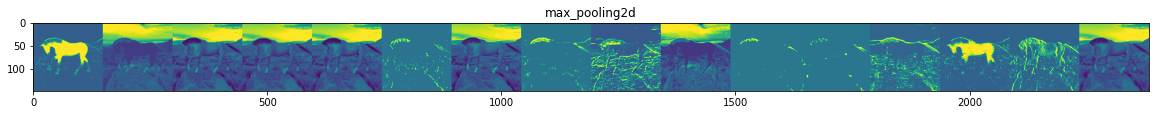

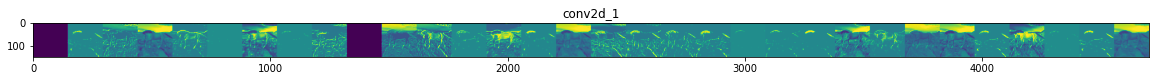

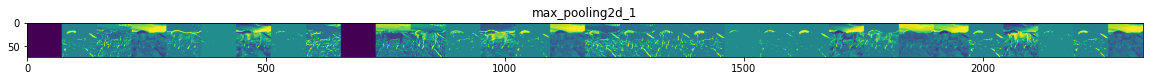

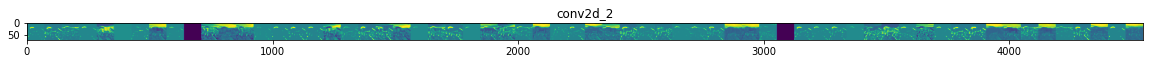

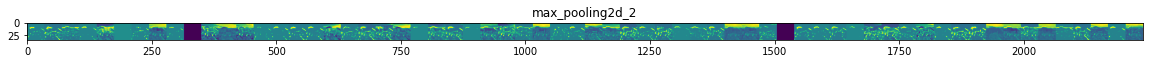

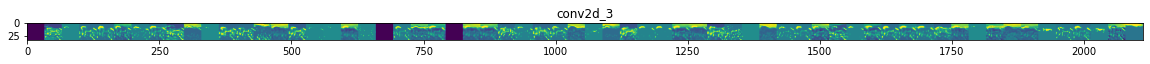

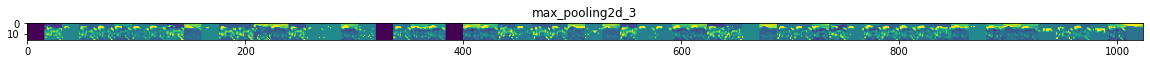

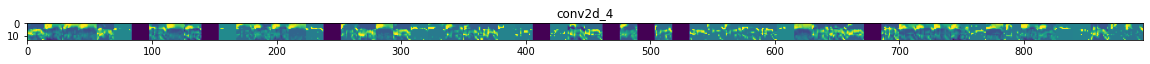

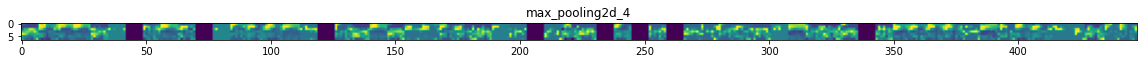

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.

These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.

## How to build a multi-class classification model?

In [ ]:
# Download data

# rps training set
!gdown --id 1DYVMuV2I_fA6A3er-mgTavrzKuxwpvKV
  
# rps testing set
!gdown --id 1RaodrRK1K03J_dGiLu8raeUynwmIbUaM

#Unzip data
import os
import zipfile

local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()

#Create folder structure
base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

#Check if it works
print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1DYVMuV2I_fA6A3er-mgTavrzKuxwpvKV
To: /content/rps.zip
100% 201M/201M [00:02<00:00, 75.0MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1RaodrRK1K03J_dGiLu8raeUynwmIbUaM
To: /content/rps-test-set.zip
100% 29.5M/29.5M [00:00<00:00, 33.2MB/s]
total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock04-119.png', 'rock04-035.png', 'rock07-k03-005.png', 'rock03-100.png', 'rock01-104.png', 'rock05ck01-086.png', 'rock06ck02-019.png', 'rock03-0

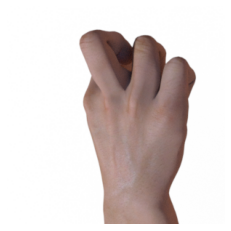

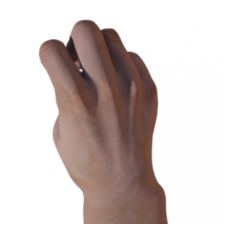

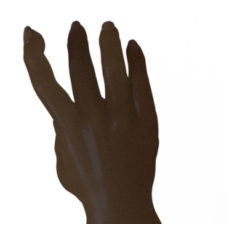

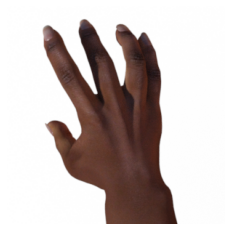

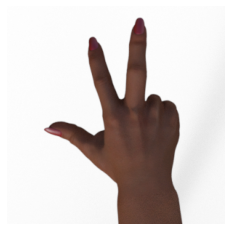

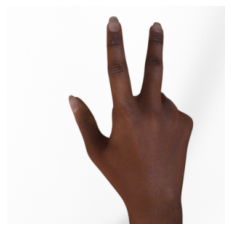

In [ ]:
# Check quality of content
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
# Create, train and save model

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tmp/rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                       

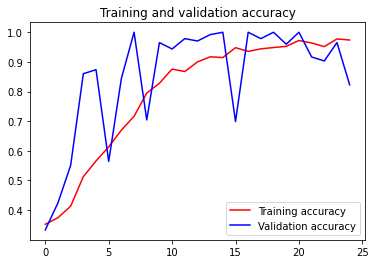

<Figure size 432x288 with 0 Axes>

In [ ]:
# Evaluate model performance

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
# Test if it works 
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving fist.jpg to fist.jpg
Saving fist2.jpg to fist2.jpg
Saving paper.jpg to paper.jpg
Saving sis1.jpg to sis1.jpg
Saving download-4.jpg to download-4.jpg
fist.jpg
[[0. 1. 0.]]
fist2.jpg
[[0. 1. 0.]]
paper.jpg
[[1. 0. 0.]]
sis1.jpg
[[0. 0. 1.]]
download-4.jpg
[[0. 1. 0.]]


## How to use CNN to improve neural networks?

### What difference does it make if we use of 16, 32 or 64 convolutions? 

In [ ]:
# Editing convolutions
# What will the impact be if we change them from 32, to 16 or 64?
# The impact with 16 filters will be computational less expensive (less training-time) but less acurracy
# The impact with 64 filters will be computational more expensive (more training-time) but higher accuracy

#Test: Convolutions 32
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.8.2
Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1491 - accuracy: 0.9552
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0503 - accuracy: 0.9847
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0320 - accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0211 - accuracy: 0.9932
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0139 - accuracy: 0.9956
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0099 - accuracy: 0.9968
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0076 - accuracy: 0.9976
Epoch 8/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0059 - accuracy: 0.9981
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0054 - accuracy: 0.9982
Epoch 10/10
313/313 [==============================] - 4s 

In [ ]:
#Test: Convolutions 16
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.8.2
Epoch 1/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1636 - accuracy: 0.9520
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0586 - accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0394 - accuracy: 0.9874
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0272 - accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0136 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0096 - accuracy: 0.9969
Epoch 8/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0085 - accuracy: 0.9971
Epoch 9/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0057 - accuracy: 0.9980
Epoch 10/10
313/313 [==============================] - 2s 

In [ ]:
#Test: Convolutions 64
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.8.2
Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1364 - accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0464 - accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0285 - accuracy: 0.9912
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0194 - accuracy: 0.9938
Epoch 5/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0131 - accuracy: 0.9958
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0088 - accuracy: 0.9969
Epoch 7/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0067 - accuracy: 0.9976
Epoch 8/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0053 - accuracy: 0.9981
Epoch 9/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0051 - accuracy: 0.9984
Epoch 10/10
313/313 [==============================] - 3s 

### What happens if we remove the CNN?

In [ ]:
#Test: DNN without Convolutions (Neural Filter)
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.8.2
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2549 - accuracy: 0.9268
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1095 - accuracy: 0.9677
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0762 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0574 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0444 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0348 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0285 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0224 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0189 - accuracy: 0.9944
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0

In [ ]:
# Results
# 1 Training-time decreases significant
# 2 Accuracy decreases minimal

### What impact will it have to add more convolution layers?

In [ ]:
#Test: Add a second CNN layer pair
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.8.2
Epoch 1/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1277 - accuracy: 0.9607
Epoch 2/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0400 - accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0268 - accuracy: 0.9918
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0189 - accuracy: 0.9942
Epoch 5/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0154 - accuracy: 0.9949
Epoch 6/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0123 - accuracy: 0.9958
Epoch 7/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0094 - accuracy: 0.9972
Epoch 8/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0075 - accuracy: 0.9976
Epoch 9/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0066 - accuracy: 0.9981
Epoch 10/10
313/313 [==============================] - 5s 

### How to implement callbacks to prevent overfitting?

In [ ]:
#Test: Add callbacks to prevent CNN from overfitting
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("acc") > 0.98):
      print("\nReached 98% of accuracy so cancelling training!")
      self.model.stop_training = True
  
callbacks = myCallback()

print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.8.2
Epoch 1/10
1875/1875 [==============================] - 60s 31ms/step - loss: 0.1292 - acc: 0.9604
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0417 - acc: 0.9868
Reached 98% of accuracy so cancelling training!
313/313 [==============================] - 3s 10ms/step - loss: 0.0362 - acc: 0.9878
0.9878000020980835


## How to use real-world images in different shapes and sizes?

## How to use image augmentation to prevent overfitting?

### My personal setup 

In [ ]:
#Setup for Whatsapp coding bot
import requests
from urllib.parse import quote_plus

number = ''
api_key = ''
message = quote_plus('Done Baby!')
requests.get(f'https://api.callmebot.com/whatsapp.php?phone={number}&apikey={api_key}&text={message}')

In [ ]:
#Setup for ColabPro

#Check GPU 
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

#Ceck Memory
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Fri Aug 19 18:13:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Create and train a model

In [ ]:
!gdown --id 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

#Send message when finished training
message = quote_plus('CNN training is done baby!')
requests.get(f'https://api.callmebot.com/whatsapp.php?phone={number}&apikey={api_key}&text={message}')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
To: /content/cats_and_dogs_filtered.zip
100% 68.6M/68.6M [00:01<00:00, 34.8MB/s]


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 21s - loss: 0.6857 - accuracy: 0.5390 - val_loss: 0.6746 - val_accuracy: 0.6040 - 21s/epoch - 212ms/step
Epoch 2/100
100/100 - 8s - loss: 0.6524 - accuracy: 0.6285 - val_loss: 0.6330 - val_accuracy: 0.6590 - 8s/epoch - 77ms/step
Epoch 3/100
100/100 - 8s - loss: 0.6014 - accuracy: 0.6650 - val_loss: 0.6076 - val_accuracy: 0.6850 - 8s/epoch - 77ms/step
Epoch 4/100
100/100 - 8s - loss: 0.5581 - accuracy: 0.7015 - val_loss: 0.6056 - val_accuracy: 0.6800 - 8s/epoch - 76ms/step
Epoch 5/100
100/100 - 8s - loss: 0.5343 - accuracy: 0.7335 - val_loss: 0.5676 - val_accuracy: 0.6960 - 8s/epoch - 77ms/step
Epoch 6/100
100/100 - 8s - loss: 0.5089 - accuracy: 0.7575 - val_loss: 0.5792 - val_accuracy: 0.6930 - 8s/epoch - 76ms/step
Epoch 7/100
100/100 - 8s - loss: 0.4827 - accuracy: 0.7570 - val_loss: 0.5420 - val_accuracy: 0.7180 - 8s/epoch - 78ms/step
Epoch 8/100
100/100 - 8s - loss: 0.4480 - acc

<Response [200]>

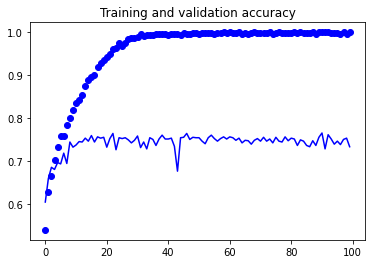

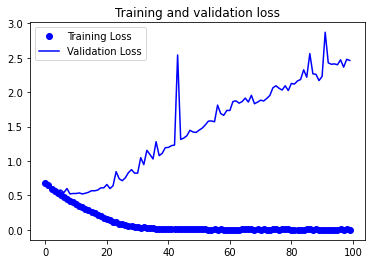

In [ ]:
# Evaluate results
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Run same CNN with DataAugmentation

In [ ]:
# !gdown --id 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9

  
# import os
# import zipfile
# import tensorflow as tf
# from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
# zip_ref.extractall("tmp/")
# zip_ref.close()

base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

#Send message when finished training
message = quote_plus('CNN training is done baby!')
requests.get(f'https://api.callmebot.com/whatsapp.php?phone={number}&apikey={api_key}&text={message}')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 17s - loss: 0.6926 - accuracy: 0.5120 - val_loss: 0.6788 - val_accuracy: 0.5680 - 17s/epoch - 167ms/step
Epoch 2/100
100/100 - 16s - loss: 0.6796 - accuracy: 0.5680 - val_loss: 0.6554 - val_accuracy: 0.6300 - 16s/epoch - 159ms/step
Epoch 3/100
100/100 - 16s - loss: 0.6673 - accuracy: 0.6000 - val_loss: 0.6315 - val_accuracy: 0.6520 - 16s/epoch - 158ms/step
Epoch 4/100
100/100 - 16s - loss: 0.6529 - accuracy: 0.5980 - val_loss: 0.6242 - val_accuracy: 0.6330 - 16s/epoch - 159ms/step
Epoch 5/100
100/100 - 16s - loss: 0.6344 - accuracy: 0.6385 - val_loss: 0.5885 - val_accuracy: 0.6810 - 16s/epoch - 160ms/step
Epoch 6/100
100/100 - 16s - loss: 0.6184 - accuracy: 0.6425 - val_loss: 0.5882 - val_accuracy: 0.6730 - 16s/epoch - 159ms/step
Epoch 7/100
100/100 - 16s - loss: 0.6049 - accuracy: 0.6735 - val_loss: 0.5552 - val_accuracy: 0.7060 - 16s/epoch - 159ms/step
Epoch 8/100
100/100 - 16s -

<Response [200]>

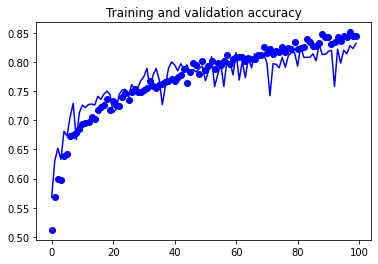

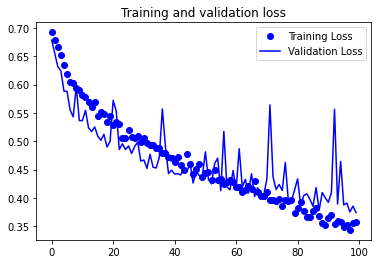

In [ ]:
#Evaluate results

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## How to use ImageDataGenerator?

In [ ]:
# data preprocessing

# ImageDataGenerator 
# data generators will read pictures in our source folders
# convert them to float32 tensors,
# and feed them (with their labels) to our network.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

In [ ]:

# ImageDataGenerator with cross-validation 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

## How to use ImageDataGenerator to label images based on the directory structure?

In [ ]:
# Download data
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5 # dataset
!gdown --id 1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U # cross-validation data

In [ ]:
# Import data

import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [ ]:
# Define directories

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [ ]:
#Lets see what the filenames look like

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

validation_horse_hames = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

print(train_horse_names[:10])
print(train_human_names[:10])

In [ ]:
# Data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

In [ ]:
# Training
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)


# Text analysis - Natrual Language Processing (NLP)

## How to build a NLP system?

### Simple example

In [ ]:

from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


### Sarcasm data example

In [ ]:


#Import data
import json
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v #dataset sarcasm.json



#Prepare data
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = [] 
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

#Preprocess data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print(len(word_index))
print(word_index)
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: /content/sarcasm.json
100% 5.64M/5.64M [00:00<00:00, 40.4MB/s]
29657
{'<OOV>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'this': 19, 'by': 20, 'after': 21, 'up': 22, 'out': 23, 'be': 24, 'how': 25, 'as': 26, 'it': 27, 'that': 28, 'not': 29, 'are': 30, 'your': 31, 'his': 32, 'what': 33, 'he': 34, 'all': 35, 'just': 36, 'who': 37, 'has': 38, 'will': 39, 'more': 40, 'one': 41, 'into': 42, 'report': 43, 'year': 44, 'why': 45, 'have': 46, 'area': 47, 'over': 48, 'donald': 49, 'u': 50, 'day': 51, 'says': 52, 's': 53, 'can': 54, 'first': 55, 'woman'

In [ ]:
datastore

In [ ]:
sentences[:5]

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way']

In [ ]:
labels[:5]

[0, 0, 1, 1, 0]

### Imdb reviews data

In [1]:
import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

2.8.2


In [2]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6ZH9RE/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6ZH9RE/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6ZH9RE/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
imdb

{Split('train'): <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('test'): <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('unsupervised'): <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [4]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']
print(train_data)
print(test_data)

<PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [5]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [44]:
testing_sentences[0]

"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come."

In [45]:
testing_labels_final[0]

1

In [ ]:
#Context
# Positive sentiment == 1
# Negative sentiment == 0

In [87]:
vocab_size = 10000 #max number of word which are going to be indexed
embedding_dim = 16
max_length = 120 #max length of a sequence
trunc_type='post' #padding zeros to the end
oov_tok = "<OOV>" #tokenize unkown words which are not in the training word.index dictonary as OutOfVocobolary(OOV)


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #Instantiate tokenizer
tokenizer.fit_on_texts(training_sentences) #let tokenizer create a dictonary with a word.index for all words from training_data
word_index = tokenizer.word_index #prep results of word.index to create a word.index list
sequences = tokenizer.texts_to_sequences(training_sentences) #create out of dict of tokens a list with sequences with many tokens
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type) #padding = adding zeros for standard size of sequences for NN

testing_sequences = tokenizer.texts_to_sequences(testing_sentences) #create lists with sequences for test_data
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, truncating=trunc_type) #create padded list with sequences for test_data

In [88]:
list(word_index.items())[:5]

[('<OOV>', 1), ('the', 2), ('and', 3), ('a', 4), ('of', 5)]

In [89]:
print(sequences[1])
print(padded[1])

[11, 26, 75, 571, 6, 805, 2354, 313, 106, 19, 12, 7, 629, 686, 6, 4, 2219, 5, 181, 584, 64, 1454, 110, 2263, 3, 3951, 21, 2, 1, 3, 258, 41, 4677, 4, 174, 188, 21, 12, 4078, 11, 1578, 2354, 86, 2, 20, 14, 1907, 2, 112, 940, 14, 1811, 1340, 548, 3, 355, 181, 466, 6, 591, 19, 17, 55, 1817, 5, 49, 14, 4044, 96, 40, 136, 11, 972, 11, 201, 26, 1046, 171, 5, 2, 20, 19, 11, 294, 2, 2155, 5, 10, 3, 283, 41, 466, 6, 591, 5, 92, 203, 1, 207, 99, 145, 4382, 16, 230, 332, 11, 2486, 384, 12, 20, 31, 30]
[   0    0    0    0    0    0    0    0   11   26   75  571    6  805
 2354  313  106   19   12    7  629  686    6    4 2219    5  181  584
   64 1454  110 2263    3 3951   21    2    1    3  258   41 4677    4
  174  188   21   12 4078   11 1578 2354   86    2   20   14 1907    2
  112  940   14 1811 1340  548    3  355  181  466    6  591   19   17
   55 1817    5   49   14 4044   96   40  136   11  972   11  201   26
 1046  171    5    2   20   19   11  294    2 2155    5   10    3  283
   41  4

In [90]:
print(testing_sequences[1])
print(testing_padded[1])
#Why is the content of the padded list not equal to the test_sequences? 

[4, 1, 696, 784, 5, 4, 178, 1, 2326, 1, 8758, 2, 8246, 13, 6079, 1, 14, 500, 6, 2716, 9, 110, 500, 6, 374, 4, 1684, 1, 9248, 17, 4, 4902, 5, 8632, 15, 33, 1, 37, 25, 2661, 997, 5, 20, 229, 10, 14, 33, 1, 674, 6, 6507, 17, 115, 276, 3, 574, 2697, 1, 1, 188, 9477, 109, 5, 1, 958, 2661, 106, 9, 1301, 5, 2, 114, 3711, 1, 7, 319, 1319, 3, 754, 8, 8, 2, 754, 5714, 7, 140, 13, 14, 4105, 172, 9, 1, 91, 287, 151, 301, 9, 5021, 10, 3278, 2, 1, 1649, 16, 1944, 3, 1, 2918, 4, 924, 13, 7107, 99, 4158, 5, 8514, 334, 1, 188, 7, 998, 51, 1, 72, 797, 1, 3132, 2, 1566, 184, 6, 2259, 9942, 86, 57, 3081, 6, 1, 16, 39, 8949, 7768, 1, 224, 2013, 3, 280, 16, 110, 184, 6, 28, 6, 336, 406, 724, 34, 40, 73, 38, 10, 40, 22, 2, 595, 234, 137, 9, 61, 27, 5978, 823, 21, 25, 5401, 3, 9, 4, 3250, 331, 46, 6, 2259, 198, 2, 111, 27, 46, 75, 969, 40, 2, 4013, 111, 13, 7, 871, 5, 4, 2326, 24, 36, 917, 86, 34, 4382, 25, 1510, 5036, 3, 73, 24, 113, 177, 250, 724, 10, 1287, 7026, 40, 22, 8, 8, 12, 7, 4, 1732, 20, 3, 11, 60,

In [91]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <OOV> into a big arm chair and <OOV> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <OOV> to cross no dangerous waters just a warm and witty <OOV> through new york life at its best a family film in every sense and one that deserves the praise it received
This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.


In [92]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                 11526     
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [93]:
#updated testing_data with trunc
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.5680 - accuracy: 0.7211 - val_loss: 0.4715 - val_accuracy: 0.8222
Epoch 2/10
782/782 [==============================] - 4s 6ms/step - loss: 0.3405 - accuracy: 0.8975 - val_loss: 0.4404 - val_accuracy: 0.8187
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 0.1850 - accuracy: 0.9617 - val_loss: 0.4703 - val_accuracy: 0.8070
Epoch 4/10
782/782 [==============================] - 4s 6ms/step - loss: 0.1114 - accuracy: 0.9815 - val_loss: 0.5446 - val_accuracy: 0.8125
Epoch 5/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0805 - accuracy: 0.9865 - val_loss: 0.5761 - val_accuracy: 0.8103
Epoch 6/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0656 - accuracy: 0.9884 - val_loss: 0.6046 - val_accuracy: 0.8092
Epoch 7/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0584 - accuracy: 0.9890 - val_loss: 0.6624 - val_accuracy: 0.8086
Epoch 

In [14]:
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 9s 6ms/step - loss: 0.4892 - accuracy: 0.7411 - val_loss: 0.3615 - val_accuracy: 0.8401
Epoch 2/10
782/782 [==============================] - 4s 6ms/step - loss: 0.2472 - accuracy: 0.9034 - val_loss: 0.3669 - val_accuracy: 0.8414
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 0.1046 - accuracy: 0.9705 - val_loss: 0.4454 - val_accuracy: 0.8267
Epoch 4/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0270 - accuracy: 0.9966 - val_loss: 0.5436 - val_accuracy: 0.8248
Epoch 5/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0064 - accuracy: 0.9995 - val_loss: 0.5909 - val_accuracy: 0.8292
Epoch 6/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.6423 - val_accuracy: 0.8294
Epoch 7/10
782/782 [==============================] - 4s 6ms/step - loss: 9.5247e-04 - accuracy: 1.0000 - val_loss: 0.6877 - val_accuracy: 0.8300
Ep

In [94]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [95]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [96]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

#Upload this data at projector.tensorflow.org to see the data in a vektorspace

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [97]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[11, 64, 102, 12, 7, 478, 1200]]


In [54]:
# Testing classification
sentence = ["this movie sucked, never again", "game of thrones season finale was funny", "I loved this movie. It has my recommendation"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating=trunc_type)
prediction = model.predict(padded)
prediction

array([[0.07242101],
       [0.41680494],
       [0.97061557]], dtype=float32)

In [101]:
# Testing classification 2 (updated test data)
sentence = ["this movie sucked, never again", "game of thrones season finale was funny", "I loved this movie. It has my recommendation"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating=trunc_type)
prediction = model.predict(padded)
prediction

array([[0.51653105],
       [0.3752822 ],
       [0.986948  ]], dtype=float32)

In [76]:
#Quality testing
review_classification = []

def classifier(prediction):
  for count, value in enumerate(prediction):
    if value >= 0.5:
      review_classification.append(f"Review Nr. {count+1} is positive with {round(value[0]*100)} %")
    else:
      review_classification.append(f"Review Nr. {count+1} is negative with {round(value[0]*100)} %")

  print(review_classification)

In [77]:
classifier(prediction)

['Review Nr. 1 is positive with 7 %', 'Review Nr. 2 is positive with 42 %', 'Review Nr. 3 is positive with 97 %']


In [102]:
#Quality testing 2 (wiht updated test_data)
review_classification = []

def classifier(prediction):
  for count, value in enumerate(prediction):
    if value >= 0.5:
      review_classification.append(f"Review Nr. {count+1} is positive with {round(value[0]*100)} %")
    else:
      review_classification.append(f"Review Nr. {count+1} is negative with {round(value[0]*100)} %")

  print(review_classification)

classifier(prediction)

['Review Nr. 1 is positive with 52 %', 'Review Nr. 2 is negative with 38 %', 'Review Nr. 3 is positive with 99 %']


In [83]:
#Quality testing with all test data

#Prediction
prediction_all_test_data = model.predict(testing_padded)
review_classification_all_test_data = []

#Classifier
def classifier(prediction):
  for count, value in enumerate(prediction):
    if value >= 0.5:
      review_classification_all_test_data.append(f"Review Nr. {count+1} is positive with {round(value[0]*100)} %")
    else:
      review_classification_all_test_data.append(f"Review Nr. {count+1} is positive with {round(value[0]*100)} %")

  print(review_classification_all_test_data[:20])

print(classifier(prediction_all_test_data))

['Review Nr. 1 is positive with 0 %', 'Review Nr. 2 is positive with 100 %', 'Review Nr. 3 is positive with 0 %', 'Review Nr. 4 is positive with 0 %', 'Review Nr. 5 is positive with 100 %', 'Review Nr. 6 is positive with 99 %', 'Review Nr. 7 is positive with 100 %', 'Review Nr. 8 is positive with 100 %', 'Review Nr. 9 is positive with 100 %', 'Review Nr. 10 is positive with 100 %', 'Review Nr. 11 is positive with 0 %', 'Review Nr. 12 is positive with 0 %', 'Review Nr. 13 is positive with 1 %', 'Review Nr. 14 is positive with 0 %', 'Review Nr. 15 is positive with 100 %', 'Review Nr. 16 is positive with 96 %', 'Review Nr. 17 is positive with 11 %', 'Review Nr. 18 is positive with 0 %', 'Review Nr. 19 is positive with 97 %', 'Review Nr. 20 is positive with 0 %']
None


In [106]:
#Quality testing with all test data (updated model)

#Prediction
prediction_all_test_data = model.predict(testing_padded)
review_classification_all_test_data = []

#Classifier
def classifier(prediction):
  for count, value in enumerate(prediction):
    if value >= 0.5:
      review_classification_all_test_data.append(f"Review Nr. {count+1} is positive with {round(value[0]*100)} %")
    else:
      review_classification_all_test_data.append(f"Review Nr. {count+1} is negative with {round(value[0]*100)} %")

  print(review_classification_all_test_data[:20])

print(classifier(prediction_all_test_data))

['Review Nr. 1 is negative with 3 %', 'Review Nr. 2 is positive with 100 %', 'Review Nr. 3 is negative with 3 %', 'Review Nr. 4 is negative with 3 %', 'Review Nr. 5 is positive with 100 %', 'Review Nr. 6 is positive with 100 %', 'Review Nr. 7 is positive with 100 %', 'Review Nr. 8 is positive with 100 %', 'Review Nr. 9 is positive with 50 %', 'Review Nr. 10 is negative with 8 %', 'Review Nr. 11 is positive with 100 %', 'Review Nr. 12 is negative with 3 %', 'Review Nr. 13 is negative with 4 %', 'Review Nr. 14 is negative with 3 %', 'Review Nr. 15 is positive with 98 %', 'Review Nr. 16 is positive with 100 %', 'Review Nr. 17 is positive with 95 %', 'Review Nr. 18 is negative with 3 %', 'Review Nr. 19 is positive with 76 %', 'Review Nr. 20 is negative with 3 %']
None


In [107]:
testing_padded[0]

array([  48,   24,  106,   13,   95, 4066,   16,  740, 5065,   10,   14,
        312,    5,    2,  579,  349,   16, 1847, 1257,    1,   16,  668,
       7666, 5531,    1,  761,    6,   13, 1026,    1,    1,  425,  478,
          1,    4,    1,  327, 3560,   20,  229,    3,   15, 5742,    3,
         15, 1620,   15,   99,    5,    2, 3550,  100,   11,  772, 1498,
         12,  252,  235,   11,  217,    2,  366, 6454,    3,   58,   93,
         11,   90,  102,   11, 1498,  177,   12,  252,   36,    6, 1126,
          1,  674,    7, 4387,    1,    4,    1,  327,    7,   36, 8300,
        366,    5, 1403,    1,   13,   29,   60,   26,    6,  867,  178,
         17,    4, 1037,    5,   12,  227,    3,   79,    4,  345,   32,
        345, 5159,    5,   10,    6, 1314, 1143,    2, 5619,    1],
      dtype=int32)

In [111]:
list(word_index.items())[:16]

[('<OOV>', 1),
 ('the', 2),
 ('and', 3),
 ('a', 4),
 ('of', 5),
 ('to', 6),
 ('is', 7),
 ('br', 8),
 ('in', 9),
 ('it', 10),
 ('i', 11),
 ('this', 12),
 ('that', 13),
 ('was', 14),
 ('as', 15),
 ('for', 16)]

In [104]:
testing_sentences[0]

"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come."

In [86]:
# Testing classification
sentence = [testing_sentences[0]]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating=trunc_type)
prediction = model.predict(padded)
prediction

array([[0.9269928]], dtype=float32)

In [112]:
# Testing classification (updated model)
sentence = [testing_sentences[0]]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating=trunc_type)
prediction = model.predict(padded)
prediction

array([[0.02548922]], dtype=float32)

In [113]:
print(sentence)

["There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come."]


### Sarcasm predictor

In [ ]:
#Import libraries
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#Define variables
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
# Import data 
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v #sarcasm.json

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: /content/sarcasm.json
100% 5.64M/5.64M [00:00<00:00, 32.8MB/s]


In [ ]:
# Load and store data
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [ ]:
# Split data
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
# Preprocess data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 24)                408       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train model
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6677 - accuracy: 0.5796 - val_loss: 0.5947 - val_accuracy: 0.7748 - 2s/epoch - 4ms/step
Epoch 2/30
625/625 - 2s - loss: 0.4429 - accuracy: 0.8292 - val_loss: 0.3911 - val_accuracy: 0.8360 - 2s/epoch - 3ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3161 - accuracy: 0.8753 - val_loss: 0.3553 - val_accuracy: 0.8536 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2629 - accuracy: 0.8982 - val_loss: 0.3454 - val_accuracy: 0.8550 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2287 - accuracy: 0.9112 - val_loss: 0.3438 - val_accuracy: 0.8577 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.1997 - accuracy: 0.9251 - val_loss: 0.3518 - val_accuracy: 0.8524 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1792 - accuracy: 0.9317 - val_loss: 0.3596 - val_accuracy: 0.8535 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1603 - accuracy: 0.9414 - val_loss: 0.3729 - val_accuracy: 0.8550 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 2s 

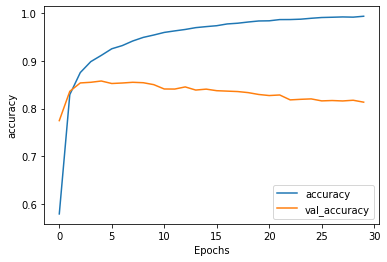

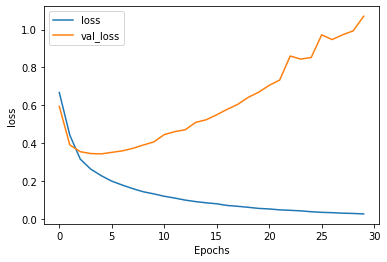

In [ ]:
#Evalute performance
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
#Decode sentences
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[2]))
print(training_sentences[2])
print(labels[2])

mom starting to fear son's web series closest thing she will have to grandchild ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [ ]:
# Get shape of vocab_size and embedding_dim
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) 

(10000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[6.1795580e-01]
 [1.9550257e-06]]


## How to prepare text to use it in TF.models?

## How to build model for binary text classifiction? 

## How to build a model for multi-class text classification?

## How to use word embeddings in your TF.model?

## How to use LSTMs for binary and for multi-class text classification?

### LSTM - Binary classification

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompletePKXOXK/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompletePKXOXK/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompletePKXOXK/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
info.features['text']

Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>)

In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 64)          523840    
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 53s 120ms/step - loss: 0.5073 - accuracy: 0.7456 - val_loss: 0.4955 - val_accuracy: 0.7638
Epoch 2/10
391/391 [==============================] - 47s 120ms/step - loss: 0.3379 - accuracy: 0.8639 - val_loss: 0.3727 - val_accuracy: 0.8396
Epoch 3/10
391/391 [==============================] - 47s 120ms/step - loss: 0.2835 - accuracy: 0.8894 - val_loss: 0.4094 - val_accuracy: 0.8319
Epoch 4/10
391/391 [==============================] - 47s 120ms/step - loss: 0.2622 - accuracy: 0.9003 - val_loss: 0.4631 - val_accuracy: 0.7838
Epoch 5/10
391/391 [==============================] - 47s 120ms/step - loss: 0.1977 - accuracy: 0.9265 - val_loss: 0.4427 - val_accuracy: 0.8250
Epoch 6/10
391/391 [==============================] - 47s 120ms/step - loss: 0.1565 - accuracy: 0.9451 - val_loss: 0.5173 - val_accuracy: 0.8431
Epoch 7/10
391/391 [==============================] - 47s 119ms/step - loss: 0.1550 - accuracy: 0.9434 - val_loss: 0.5093 - val_ac

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

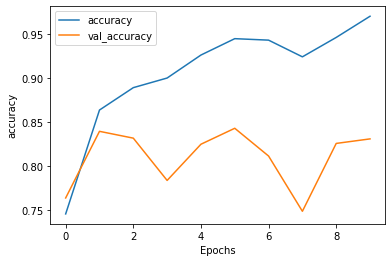

In [ ]:
plot_graphs(history, 'accuracy')

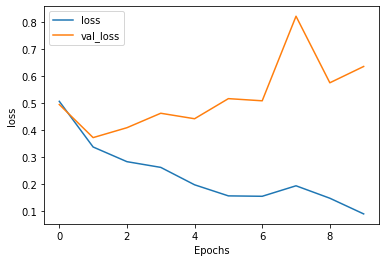

In [ ]:
plot_graphs(history, 'loss')

### Multilayer LSTM

In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

tokenizer = info.features['text'].encoder

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [ ]:
test_dataset

<PaddedBatchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
#Train model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS=10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, None, 64)          523840    
                                                                 
 bidirectional_12 (Bidirecti  (None, None, 128)        66048     
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, 64)               41216     
 onal)                                                           
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 635,329
Trainable params: 635,329
Non-t

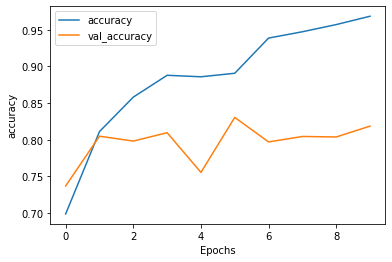

None


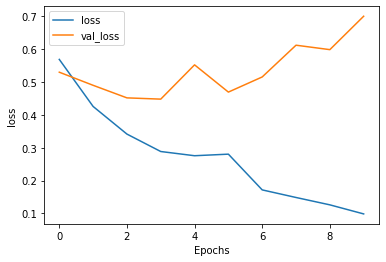

None


In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, "val_"+string])
  plt.show()

print(plot_graphs(history, 'accuracy'))
print(plot_graphs(history, 'loss'))

## How to add RNN and GRU layers to your model?

### Binary classification with GRU layers

In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

tokenizer = info.features['text'].encoder

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [ ]:
#Train model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,64),
    tf.keras.layers.Conv1D(128, 5, activation="relu"),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data =test_dataset)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, None, 64)          523840    
                                                                 
 conv1d (Conv1D)             (None, None, 128)         41088     
                                                                 
 global_average_pooling1d_3   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 1)                 65        
                                                                 
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_______________________________________________

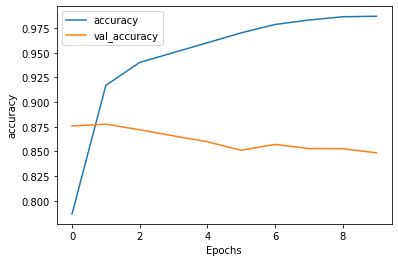

None


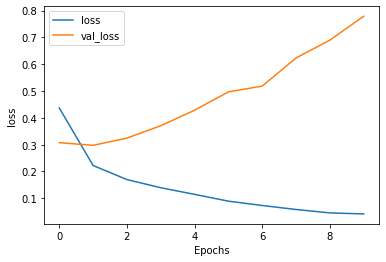

None


In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

print(plot_graphs(history, "accuracy"))
print(plot_graphs(history, "loss"))

## How to use RNNs, LSTMs, GRUs and CNNs in models that work with text?

## How to train LSTMs on existing text to generate new text (e.g. songs or poetry)?

## Multiple choice questions


Question 1
Why does sequence make a large difference when determining semantics of language?

Because the order in which words appear dictate their impact on the meaning of the sentence

Question 2
How do Recurrent Neural Networks help you understand the impact of sequence on meaning?

They carry meaning from one cell to the next

Question 3
How does an LSTM help understand meaning when words that qualify each other aren’t necessarily beside each other in a sentence?

Values from earlier words can be carried to later ones via a cell state

Question 4
What keras layer type allows LSTMs to look forward and backward in a sentence?

Bidirectional

Question 5
What’s the output shape of a bidirectional LSTM layer with 64 units?

(None,128)

Question 6
When stacking LSTMs, how do you instruct an LSTM to feed the next one in the sequence?

Ensure that return_sequences is set to True only on units that feed to another LSTM

Question 7
If a sentence has 120 tokens in it, and a Conv1D with 128 filters with a Kernal size of 5 is passed over it, what’s the output shape?



Question 8
What’s the best way to avoid overfitting in NLP datasets?

not LSTMs, GRUs odr Conv1D

# Time series forecasting